# Generate simple plot for (every) indicator
This **pipeline** shows how to generate a simple sinlge plot beginning with any .csv file in the *source* folder. It is a generic version, which means that for each file minor changes will be needed.

## Preliminars

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Call desired data
df_meta = pd.read_csv('Indicators_metadata.csv')
source_name = 'bp_elec_gen'
df = pd.read_csv('source_data/Energy/' + source_name + '.csv')

In [3]:
# call metadata of the indicator
df_meta_temp = df_meta.set_index('SOURCE FILE')
Units_ind= df_meta_temp['UNIT'][source_name]
Origin_ind= df_meta_temp['SITE'][source_name]
Name_ind =  df_meta_temp['INDICATOR'][source_name]
Key_ind =  df_meta_temp['KEY'][source_name]
Desc_ind =  df_meta_temp['DESCRIPTION'][source_name]

### Preview of the DataFrame

In [ ]:
# Check column names
df.columns

In [ ]:
# Check country name available
df.Country.unique()

In [ ]:
# Check column characteristics
df.describe()

### Set Index temporarily to ease manipulation and guarantee final homogeneity

In [4]:
index = ['Country']
df=df.set_index(index)
#df_p=df_p.rename(columns={'':'Country'})

### Select countries and time range

In [5]:
# Assign selected Countries (carefull with the names: Case sensitive, etc.)
sel_c = ['US', 'India', 'Germany','China']
# Assign selected Years or interval
sel_y = [2000,2019]#one member more
sel_years = [*range(sel_y[0],sel_y[1])] #using unpacking(*) operator
sel_years = [str(x) for x in sel_years]

In [6]:
# Apply selection criteria
df_p = df[sel_years][df.index.isin(sel_c)]

### Reform the DF to a suitable form

In [ ]:
# Reset index to return DF to a tidy state
#df_p=df.reset_index()

In [7]:
# Melt to a Long format
df_p=df_p.reset_index().melt(id_vars='Country')
#df_p2=df_p.melt()

In [ ]:
df_p.head()

### 2.4 Do further necessary adjustments

In [ ]:
# Show column types
display(df_p.dtypes) 

In [ ]:
# Coerce column types when needed
#df_p.value=pd.to_numeric(df_p.value)
# instedad of 'to_numeric()', 'astype()' or '.apply()' could have been used

In [ ]:
# Group when timestamps shorter than a year 
#df_p=df_p.groupby(['country','Year']).sum()

In [8]:
# Rename columns to improve coding readability
df_p=df_p.rename(columns={'variable':'year'})
df_p=df_p.rename(columns={'value':'elec_gen'})

In [9]:
df_p.head()

,Country,year,elec_gen
0,US,2000,4052.253106
1,Germany,2000,576.556000
2,China,2000,1355.600000
3,India,2000,571.393936
4,US,2001,3984.467890


### Plot the indicator

In [10]:
# Here some features of the seaborn package or an eventual coupling 
# with R to use the GGPlot library is to be introduced
# Use Guillermo's preferences for graph aesthetics
sns.set_context('notebook')
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

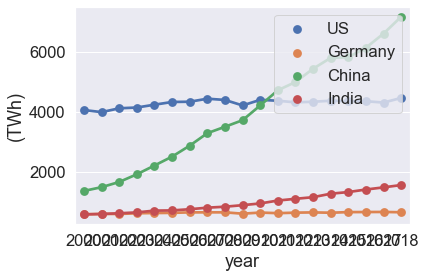

In [11]:
# Simple Plot
plt.figure()
sns.pointplot(x='year', y='elec_gen', data=df_p, hue='Country')
plt.ylabel(Units_ind)
#plt.xlabel('Month')
plt.legend(loc=1)

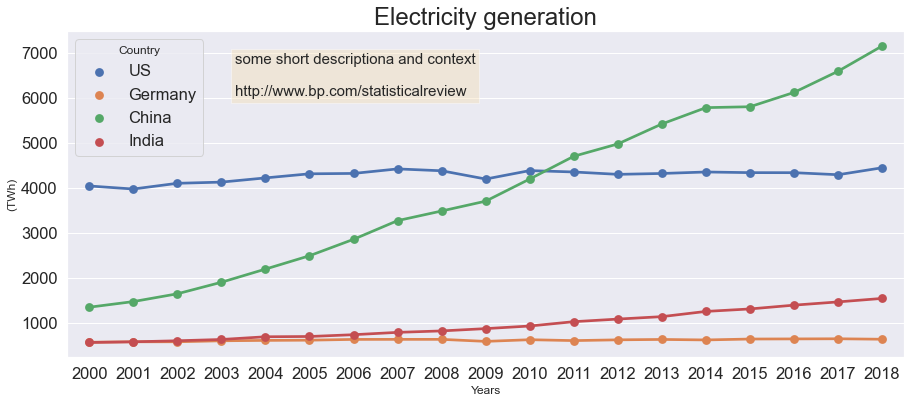

<Figure size 432x288 with 0 Axes>

In [12]:
# Sophisticated Plot

# Set figure size (width, height) in inches 
fig, ax = plt.subplots(figsize = ( 15 , 6 )) 
  
# Plot the scatterplot 
sns.pointplot(ax = ax , x='year', y='elec_gen', data=df_p, hue='Country')
#sns.scatterplot( ax = ax , x='Year', y='value', data=df_graph) 

# Set Subtitle 
text_ind = '\n'.join((Desc_ind, " ", Origin_ind))
plt.text(x=0.2, y=0.8, s=text_ind, fontsize=15, transform=ax.transAxes,  bbox=dict(facecolor='wheat', alpha=0.4))

# Set label for x-axis 
ax.set_xlabel( 'Years' , size = 12 ) 
  
# Set label for y-axis 
ax.set_ylabel( Units_ind , size = 12 ) 
  
# Set title for plot 
ax.set_title( Name_ind , size = 24 ) 
  
# Display figure 
plt.show() 

# Save the figure
plt.savefig(Key_ind+'.jpg')